### Week 5: Midterm Materials

Author: Victor Tran

For the midterm, I would like to improve upon my individual assignments from Week 3 and 4, demonstrating the geographic distribution of rent/severe rent burden and where LIHTC units are being built in the city of Los Angeles, in support of my group’s midterm. 

From our proposal, the research question is: Are patterns of housing development (i.e. where affordable housing and market rate housing get built and don’t get built), helping to uphold racial and socioeconomic segregation in Los Angeles? A case of High Resource neighborhoods of Los Angeles. Our group plans to examine patterns of development, gentrification, community resources, and segregation. As such, we are interested in looking at patterns of racial and socioeconomic segregation in the city of Los Angeles, and how patterns of housing development (both market rate and affordable housing), resource distribution, and other factors represent these disparities and can serve to reinforce and perpetuate them.

#### Identification of Data Sources

- Rent Burden: I explored the census variables on rent burden in census tracts in the county of Los Angeles, with particular focus on higher income/resourced neighborhoods compared to lower income/less resourced neighborhoods. More specifically, I downloaded the data from Social Explorer, with data in census tracts in LA County (FIPS code: 06037) on "Residents Paying More Than 30% or at least 50% of Income on Rents". Data Source: Social Explorer Tables: ACS 2021 (5-Year Estimates)(SE), ACS 2021 (5-Year Estimates), Social Explorer; U.S. Census Bureau. This variable is relevant to our research question because rent burden indicates levels of housing affordability in various areas of the city and provides insight into the purchasing power of households given their geographic location. 
- LIHTC Units in Service: the total number of units in service through the Low Income Housing Tax Credit (LIHTC) program in the city of Los Angeles between 2010-2019. This data comes from the [USC Neighborhood Data for Social Change (NDSC)](https://la.myneighborhooddata.org/2021/06/low-income-housing-tax-credits-lihtc/) via the U.S. Department of Housing and Urban Development (HUD). I find that this variable is important to look at, especially in the context of fair housing, as it looks at the current geographic distribution of affordable housing that is funded with federal tax credits that is supposed to reduce concentrated poverty in government-subsidized housing. 
- For a look into socioeconomic disparities, I am using data on poverty from the [USC Neighborhood Data for Social Change (NDSC)](https://la.myneighborhooddata.org/2021/06/poverty/). The federal poverty threshold is established annually by the U.S. Census Bureau to measure the number of people in poverty. It calculates an income cutoff (or threshold) for poverty based on the number of adults and children in a household. Any household having an income below 100 percent of the threshold is considered to be in poverty. This data comes from the American Community Survey (ACS), 5-year estimates, Table C17002, and I am looking at data for 2021. Below 100% Poverty Threshold: The percentage of the population living in a family earning below 100% of the federal poverty threshold. Below 200% Poverty Threshold: The percentage of the population living in a family earning below 200% of the federal poverty threshold.
- For the geodata, I am using the 2020 census tracts in the county of Los Angeles, from the [Los Angeles Geohub](https://geohub.lacity.org/datasets/lacounty::census-tracts-2020/about) since this matches the geographic scope of my rent burden and LIHTC data.
- To further refine my geographic scope for the city of Los Angeles, I am also using the city boundary geoJSON files from the [Los Angeles Geohub](https://geohub.lacity.org/datasets/lahub::city-boundary/explore).

### Examining Rent/Severe Rent Burden

In order to start data exploration, I will need to use the pandas library

In [1]:
import pandas as pd

Now, I will load the data I download from Social Explorer, with data in census tracts in LA County (FIPS code: 06037) on "Residents Paying More Than 30% or at least 50% of Income on Rents". Data Source: Social Explorer Tables: ACS 2021 (5-Year Estimates)(SE), ACS 2021 (5-Year Estimates), Social Explorer; U.S. Census Bureau

In [2]:
LACounty = pd.read_csv('data/LA_County_Rent_Burden.csv')

In [3]:
LACounty.shape

(2498, 58)

Using the shape function to see the size of the data. We see that there are 2498 rows and 58 columns

In [4]:
## head() to give me a sampling of the first 5 rows in the dataset
LACounty.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_B18002_001,SE_B18002_002,SE_B18002_003
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,644,179,175
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,344,181,62
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,762,198,210
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1140,346,410
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,NaN,NaN,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,816,44,488


Using the .info() function will show us the data types of each column in our dataset. Like Lab, I used the "verbose=True, show_counts=True" argument since the dataset has so many columns.

In [5]:
LACounty.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   int64  
 1   Geo_QName      2498 non-null   object 
 2   Geo_FILEID     2498 non-null   object 
 3   Geo_STUSAB     2498 non-null   object 
 4   Geo_SUMLEV     2498 non-null   int64  
 5   Geo_GEOCOMP    2498 non-null   int64  
 6   Geo_LOGRECNO   2498 non-null   int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      2498 non-null   int64  
 12  Geo_COUNTY     2498 non-null   int64  
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      2498 non-null   int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIAN

It is interesting to note what the data types are for each column, and to see that many of the columns have 0 non-null entries.

Assigning data types on import - Upon importing the data, I am looking closer at the FIPS code column that will be the unique identifier

In [6]:
LACounty.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

Like in lab, we are running into the leading zero dilemma as the leading zero typically found in the FIPS code is not showing up. In order to fix this issue, I have re-imported the data below and have specified the FIPS column as a string.

In [7]:
LACounty = pd.read_csv(
    'data/LA_County_Rent_Burden.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [8]:
# Checking the data again to see if the FIPS leading zero has reappeared
LACounty.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_B18002_001,SE_B18002_002,SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,644,179,175
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,344,181,62
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,762,198,210
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1140,346,410
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,NaN,NaN,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,816,44,488


I am now confirming that the datatypes have changed correctly after reimporting the data.

In [9]:
LACounty.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   object 
 1   Geo_QName      2498 non-null   object 
 2   Geo_FILEID     2498 non-null   object 
 3   Geo_STUSAB     2498 non-null   object 
 4   Geo_SUMLEV     2498 non-null   int64  
 5   Geo_GEOCOMP    2498 non-null   int64  
 6   Geo_LOGRECNO   2498 non-null   int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      2498 non-null   object 
 12  Geo_COUNTY     2498 non-null   object 
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      2498 non-null   int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIAN

Drop/Delete the Null Columns - It is evident that many of the columns in the social explorer dataset I downloaded have null values (i.e. have no entries/data in them). To find out what the null columns are in the data, I will use the isna() and .all() commands, to find the columns that have all empty values

In [10]:
LACounty.columns[LACounty.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

Now that I have a list of columns that do not have data in them, I will proceed to eliminate them from the data to simplify it. I will use the .dropna() command with the additional arguments of axis=1 and how="all"

In [11]:
LACounty = LACounty.dropna(axis=1,how="all")

In [12]:
# Check to see that the selected columns have been eliminated
LACounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   Geo_QName      2498 non-null   object
 2   Geo_FILEID     2498 non-null   object
 3   Geo_STUSAB     2498 non-null   object
 4   Geo_SUMLEV     2498 non-null   int64 
 5   Geo_GEOCOMP    2498 non-null   int64 
 6   Geo_LOGRECNO   2498 non-null   int64 
 7   Geo_STATE      2498 non-null   object
 8   Geo_COUNTY     2498 non-null   object
 9   Geo_TRACT      2498 non-null   int64 
 10  Geo_GEOID      2498 non-null   object
 11  Geo_NAME       2498 non-null   object
 12  SE_B18002_001  2498 non-null   int64 
 13  SE_B18002_002  2498 non-null   int64 
 14  SE_B18002_003  2498 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 292.9+ KB


In [13]:
# Check to see how the data looks with the eliminated columns
LACounty.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_B18002_001,SE_B18002_002,SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,14000US06037101110,Census Tract 1011.10,644,179,175
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,14000US06037101122,Census Tract 1011.22,344,181,62
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,14000US06037101220,Census Tract 1012.20,762,198,210
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,14000US06037101221,Census Tract 1012.21,1140,346,410
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,14000US06037101222,Census Tract 1012.22,816,44,488


Defining Columns to Keep - With the data I downloaded from social explorer, I also looked at the data dictionary to understand which columns would be useful for my particular research inquiry. I will only keep the four columns listed below:
- GeoFIPS: Geographic identifier
- SE_B18002_001: Renter-Occupied Housing Units
- SE_B18002_002: Renter-Occupied Housing Units: 30 to 49 Percent
- SE_B18002_003: Renter-Occupied Housing Units: 50 percent or More

I will define the columns I want to keep by creating a subset of the dataframe and creating a new dataframe, now called Rent Burden

In [14]:
columns_to_keep = ['Geo_FIPS',
                   'SE_B18002_001',
                   'SE_B18002_002',
                   'SE_B18002_003']
RentBurden = LACounty[columns_to_keep]

Renaming Columns - The automatic column names from social explorer/the census data are not very useful or memorable; I will create a list of column names and replaced the values with my new desired column names = 'FIPS', 'Renter-Occupied Housing Units', 'Residents Paying 30% to 49% of Income on Rent', and 'Residents Paying 50% or more of Income on Rent'

In [15]:
columns = list(RentBurden)
columns

['Geo_FIPS', 'SE_B18002_001', 'SE_B18002_002', 'SE_B18002_003']

In [16]:
RentBurden.columns = ['FIPS',
'Renter-Occupied Housing Units',
'Residents Paying 30% to 49% of Income on Rent',
'Residents Paying 50% or more of Income on Rent']

In [17]:
# Check to see that my columns have been renamed appropriately
RentBurden.sample(5)

,FIPS,Renter-Occupied Housing Units,Residents Paying 30% to 49% of Income on Rent,Residents Paying 50% or more of Income on Rent
2244,06037700600,183,35,66
439,06037189201,1592,315,492
2351,06037901218,7,7,0
65,06037108101,114,15,13
412,06037183820,1041,165,185


Simple Stats and Plotting the Data - I will start examining my data with commands to produce some introductory statistics, such as the .describe() coommand. I will also plot one of the variables down below.

In [18]:
# This command will provide the count, mean, standard deviation, minimum, 
# maximum, median, and the 25th and 75th quartiles
RentBurden['Residents Paying 30% to 49% of Income on Rent'].describe()

count    2498.000000
mean      183.253803
std       139.503165
min         0.000000
25%        74.000000
50%       159.500000
75%       259.000000
max      1032.000000
Name: Residents Paying 30% to 49% of Income on Rent, dtype: float64

<AxesSubplot: ylabel='Frequency'>

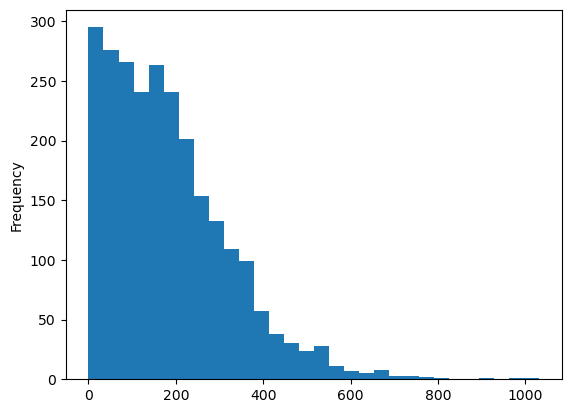

In [19]:
# I will now plot the 'Residents Paying 30% to 49% of Income on Rent' variable
# as a histogram with 30 bins
RentBurden['Residents Paying 30% to 49% of Income on Rent'].plot.hist(bins=30)

<AxesSubplot: >

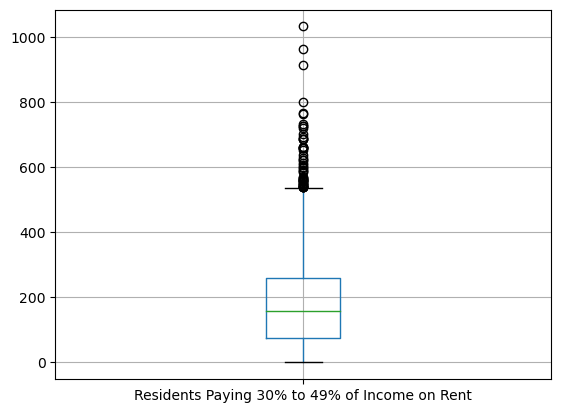

In [20]:
# I can generate a box plot for the same varible
RentBurden.boxplot(column=['Residents Paying 30% to 49% of Income on Rent'])

<AxesSubplot: xlabel='Residents Paying 30% to 49% of Income on Rent', ylabel='Renter-Occupied Housing Units'>

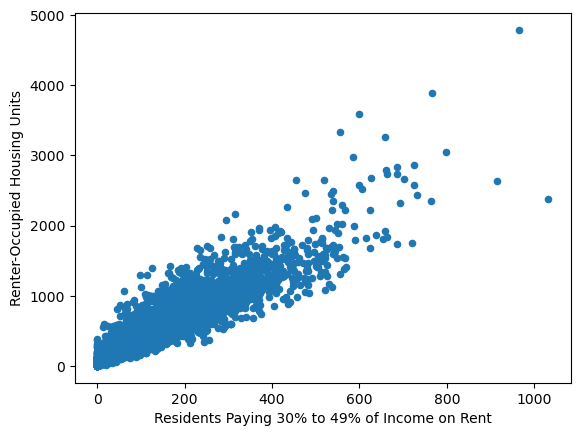

In [21]:
# For a scatterplot, I have made the x-axis 'Residents Paying 30% to 49% of Income on Rent',
# and the y-axis Renter-Occupied Housing Units'
RentBurden.plot.scatter(x='Residents Paying 30% to 49% of Income on Rent',y='Renter-Occupied Housing Units')

Sorting the Data (Top-Down) - What are the top 10 census tracts with the most number of residents experiencing rent burden (spending 30%-49% of their incomes on rent)? We can sort the data by this column.

In [22]:
RentBurdenSorted = RentBurden.sort_values(by='Residents Paying 30% to 49% of Income on Rent',ascending = False)

In [23]:
# I have sorted the data and will display the top 10 census tracts
RentBurdenSorted[['FIPS','Residents Paying 30% to 49% of Income on Rent']].head(10)

,FIPS,Residents Paying 30% to 49% of Income on Rent
602,06037207502,1032
2278,06037702900,964
2249,06037700902,914
2264,06037701902,799
2239,06037700200,766
2036,06037576602,764
604,06037207712,732
1028,06037275604,725
2026,06037576200,725
92,06037111402,721


<AxesSubplot: xlabel='FIPS'>

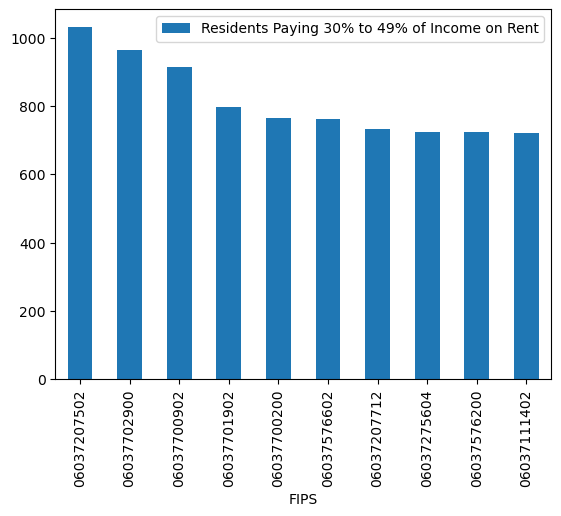

In [24]:
# I can plot these results
RentBurdenSorted.head(10).plot.bar(x='FIPS',
                            y='Residents Paying 30% to 49% of Income on Rent')

What are the top 10 census tracts with the most number of residents experiencing severe rent burden (spending 50% or more of their incomes on rent)? Again, we can sort the data by this column and plot it

In [25]:
SevereRentBurdenSorted = RentBurden.sort_values(by='Residents Paying 50% or more of Income on Rent',ascending = False)

In [26]:
SevereRentBurdenSorted[['FIPS','Residents Paying 50% or more of Income on Rent']].head(10)

,FIPS,Residents Paying 50% or more of Income on Rent
2278,06037702900,1324
2239,06037700200,1066
1124,06037301601,1065
1123,06037301502,946
319,06037134905,896
606,06037207902,858
939,06037265303,855
1142,06037302401,852
2026,06037576200,849
472,06037191000,843


<AxesSubplot: xlabel='FIPS'>

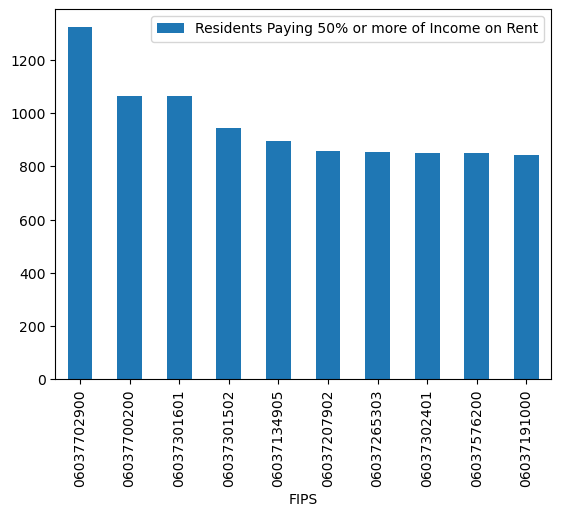

In [27]:
SevereRentBurdenSorted.head(10).plot.bar(x='FIPS',
                            y='Residents Paying 50% or more of Income on Rent')

Mapping with Geopandas - With using Geopandas, I have found a geojson file from the Los Angeles GeoHub that shows all the census tracts in the city of Los Angeles based on the 2010 population

In [28]:
import geopandas as gpd

In [29]:
LACountyTracts=gpd.read_file('data/Census_Tracts_2020.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [30]:
# Open the data and check to see what the columns are
LACountyTracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

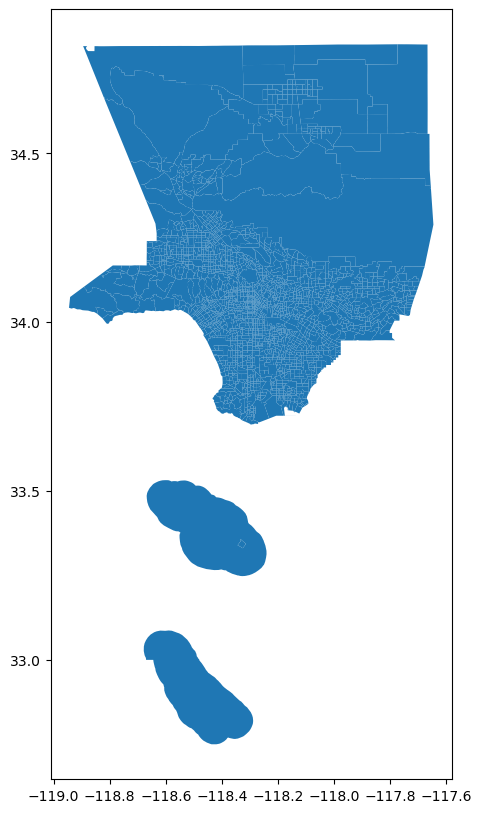

In [31]:
# Since there is a geography column, we can plot this and see how it looks
LACountyTracts.plot(figsize=(12,10))

In [32]:
# I can learn more about this data set with the .info() command
LACountyTracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


Since I really only care about the FIPS and geometry columns in this data, I can subset the data

In [33]:
LACountyTracts = LACountyTracts[['CT20','geometry']]

In [34]:
# check to see if I have the desired subset 
LACountyTracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


Since the 'TRACTCE10' FIPS code column currently is missing the state and county code, I need to add them and create a new FIPS column

In [35]:
LACountyTracts['FIPS'] ='06' + '037' + LACountyTracts['CT20']

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [36]:
LACountyTracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


Merging and Joining the Data - After cleaning up my data, I have the census data from social explorer and the geo data from the Los Angeles GeoHub - with both having the correct FIPS code. I will create a new dataframe based on this join

In [37]:
RentBurdenTracts=LACountyTracts.merge(RentBurden,on="FIPS")

In [40]:
RentBurdenTracts.head()
from pathlib import Path  

filepath = Path('rentburden.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

RentBurdenTracts.to_csv(filepath)  

Creating Choropleth Maps in Geopandas - Since I have three variables of interest:

- 'Renter-Occupied Housing Units'
- 'Residents Paying 30% to 49% of Income on Rent'
- 'Residents Paying 50% or more of Income on Rent'

I can create choropleth maps for each of them in geopandas, using the quantiles color scheme

Choropleth Map for 'Residents Paying 30% to 49% of Income on Rent' using the Quantiles and Natural Breaks schemes

In [ ]:
RentBurdenTracts.plot(figsize=(12,10),
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# Choropleth Map for 'Residents Paying 30% to 49% of Income on Rent' using the
# Natural Breaks scheme
RentBurdenTracts.plot(figsize=(12,10),
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# Choropleth Map for 'Residents Paying 50% or more of Income on Rent' using the
# quantiles scheme
RentBurdenTracts.plot(figsize=(12,10),
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# Choropleth Map for 'Residents Paying 50% or more of Income on Rent' using the
# Natural Breaks scheme
RentBurdenTracts.plot(figsize=(12,10),
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# Choropleth Map for 'Renter-Occupied Housing Units' using the
# quantiles scheme
RentBurdenTracts.plot(figsize=(12,10),
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# Choropleth Map for 'Renter-Occupied Housing Units' using the
# Natural Breaks scheme
RentBurdenTracts.plot(figsize=(12,10),
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='NaturalBreaks')

Since the maps are all focusing on LA County as a whole, I will assign additional arguments to zoom the map into LA City and restrict the plot by the coordinates that represent LA City

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenTracts.plot(
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

I will try to use the overlay function to see if I can only get the city of Los Angeles to show up on the map - I followed this [tutorial](https://geopandas.org/en/stable/docs/user_guide/set_operations.html)

In [ ]:
#Importing a LA boundary map
LACityOutline = gpd.read_file('data/City_Boundary.geojson')

In [ ]:
RentBurdenLACity = RentBurdenTracts.overlay(LACityOutline, how ='intersection')

In [ ]:
RentBurdenLACity.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
RentBurdenLACity.plot(
                 column='Renter-Occupied Housing Units',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.65, 34.45)
ax.set_xlim(-118.7,-118.12)

### The Geographic Distribution of LIHTC Units

In order to start data exploration, I will need to use the pandas library and load the data I downloaded from the USC Neighborhood Data for Social Change

In [ ]:
import pandas as pd

In [ ]:
LIHTC = pd.read_csv('data/All Years LIHTC Calculations with FIPS.csv')

Examine the newly imported data using the shape, head, and info functions

In [ ]:
LIHTC.shape

In [ ]:
LIHTC.head()

In [ ]:
LIHTC.info()

The GeoFIPS column is a float64 datatype and not an object.string - so I will next reimport the data and have specified the GeoFIPS column as a string

In [ ]:
LIHTC = pd.read_csv(
    'data/All Years LIHTC Calculations with FIPS.csv',
    dtype=
    {
        'FIPS':str,
    }
)

In [ ]:
LIHTC.info()

The GeoFIPS column data type has been updated correctly. I will now define the columns I want to keep that will be useful for my particular research inquiry. In this case, I am only interested in the GeoFIPS and 'li_units_count' columns. These columns include the geographic identifier (by census tract) and the total number of low income units built in LIHTC properties in a particular census tract

In [ ]:
LIHTC.head()

In [ ]:
columns_to_keep = ['FIPS',
                   'li_units_count']
LIHTCunits = LIHTC[columns_to_keep]

In [ ]:
LIHTCunits

I have successfully defined the two columns I want to keep in the new variable LITHCunits. I will start examining this data with commands to produce some introductory/simple statistics, such as the .describe() command.

In [ ]:
LIHTCunits['li_units_count'].describe()

Here I see the average number of low-income housing units in LIHTC developments in the census tracts that do have them. I also see that the minimum amount of units is 2 while the maximum is 1,142 units in one particular census tract - which is a very large range. I will now plot the low income units variable as a histogram with 30 bins

In [ ]:
LIHTCunits['li_units_count'].plot.hist(bins=30)

This histogram shows that the large majority of census tracts that do have LIHTC units with low income units typically have low amounts of these units while there are some notable outliers on the higher end - I can also generate a box plot for the same varible below, and see the outliers as well

In [ ]:
LIHTCunits.boxplot(column=['li_units_count'])

I am curious to see the top 10 census tracts that have the most amount of low income housing units. I can sort the data by this column using the sort_values function

In [ ]:
LIHTCunits_sorted = LIHTCunits.sort_values(by='li_units_count',ascending = False)

I have sorted the data and will display the top 10 census tracts. I can also plot these results in a bar chart

In [ ]:
LIHTCunits_sorted[['FIPS','li_units_count']].head(10)

In [ ]:
LIHTCunits_sorted.head(10).plot.bar(x='FIPS',
                            y='li_units_count')

With using Geopandas, I have found a geojson file from the Los Angeles GeoHub that shows all the census tracts in the county of Los Angeles. I will need to merge the data and geodata files in order to map the LIHTC data. I will start with importing geopandas and the geodata file I have downloaded

In [ ]:
import geopandas as gpd

In [ ]:
LACountyTracts.plot()

In [ ]:
LACountyTracts.head()

After cleaning up my data, I have the LIHTC data and the geo data from the Los Angeles GeoHub - with both having the correct FIPS code. I will now merge the data and geodata together. I will create a new dataframe based on this join down below

In [ ]:
LIHTCneighborhoods=LACountyTracts.merge(LIHTCunits,on="FIPS")

In [ ]:
LIHTCneighborhoods.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
LIHTCneighborhoods.plot(
                 column='li_units_count',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

The plot above maps the census tracts with LIHTC low income units in LA County, with coordinates specified for LA City. Create an overlay so we can map only the census tracts that are inside of the city of Los Angeles

In [ ]:
LIHTCLACity = LIHTCneighborhoods.overlay(LACityOutline, how ='intersection')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
LIHTCLACity.plot(
                 column='li_units_count',
                 legend=True, 
                 scheme='NaturalBreaks',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
LIHTCLACity.plot(
                 column='li_units_count',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
LIHTCLACity.plot(
                 column='li_units_count',
                 legend=True, 
                 scheme='equal_interval',
                 ax=ax)

ax.set_ylim(33.6, 34.4)
ax.set_xlim(-118.7,-118.12)

Overall, I believe the quantiles scheme is able to show the data in the most impactful way. Because there are outliers in the data, the natural breaks and equal interval schemes don't show as much difference/variations in the data. Quantiles is able to show the different levels of low income housing units in the city, and the areas that have a larger concentration of these units. It is also very notable that the majority of census tracts in the city of Los Angeles do not have any LIHTC units in general between 2010-2019.

I will now experiment with a basemap for the LIHTC low income units in the city of Los Angeles

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
LIHTCLACity.crs

In [ ]:
LIHTCLACity_web_mercator = LIHTCLACity.to_crs(epsg=3857)

In [ ]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))

#adding colour to the plot
LIHTCLACity_web_mercator.plot(
            ax=ax,   
            column = 'li_units_count',   # column that defines the color of the dots
            scheme='NaturalBreaks',
            legend = True     # add a legend           
)
                
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('LIHTC Low-Income Units in the City of Los Angeles')

# add a basemap
ctx.add_basemap(ax, crs=3857)

### Socioeconomic Disparities in Los Angeles

To look at socioeconomic disparities, I have used the data on poverty rates in LA County census tracts as only looking at average and median income would not highlight income/wealth disparities that may exist. For this data, I am using percentage of the population living in a family earning below 100% or 200% of the federal poverty threshold in LA county census tracts (which I will later refine for the city of Los Angeles).

In [ ]:
import pandas as pd

In [ ]:
Poverty = pd.read_csv('data/2021 Poverty Calculations LA County.csv')

In [ ]:
Poverty.shape

In [ ]:
Poverty.head()

In [ ]:
Poverty = pd.read_csv(
    'data/2021 Poverty Calculations LA County.csv',
    dtype=
    {
        'FIPS':str,
    }
)

In [ ]:
Poverty.head()

In [ ]:
columns_to_keep = ['FIPS',
                   'pop_below_100_pct',
                   'pop_below_200_pct',
                  ]

In [ ]:
PovertyPercent = Poverty[columns_to_keep]

In [ ]:
PovertyPercent

In [ ]:
import geopandas as gpd

In [ ]:
RentBurdenLACity.plot()

In [ ]:
PovertyLACity=RentBurdenLACity.merge(PovertyPercent,on="FIPS")

In [ ]:
PovertyLACity.head()

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_100_pct',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_100_pct',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_100_pct',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_200_pct',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_200_pct',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
PovertyLACity.plot(figsize=(12,10),
                 column='pop_below_200_pct',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
PovertyLACity.crs

In [ ]:
PovertyLACity_web_mercator = PovertyLACity.to_crs(epsg=3857)

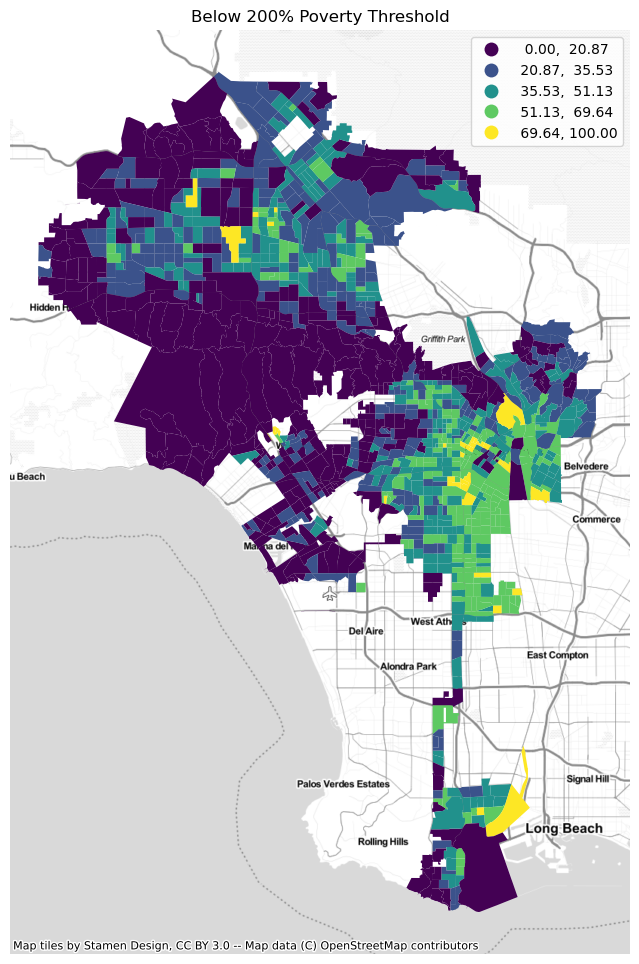

In [112]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))

#adding colour to the plot
PovertyLACity_web_mercator.plot(
            ax=ax,   
            column='pop_below_200_pct',
            legend=True, 
            scheme='NaturalBreaks'          
)
                
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Below 200% Poverty Threshold')

# add a basemap
ctx.add_basemap(ax, crs=3857, source=ctx.providers.Stamen.TonerLite)

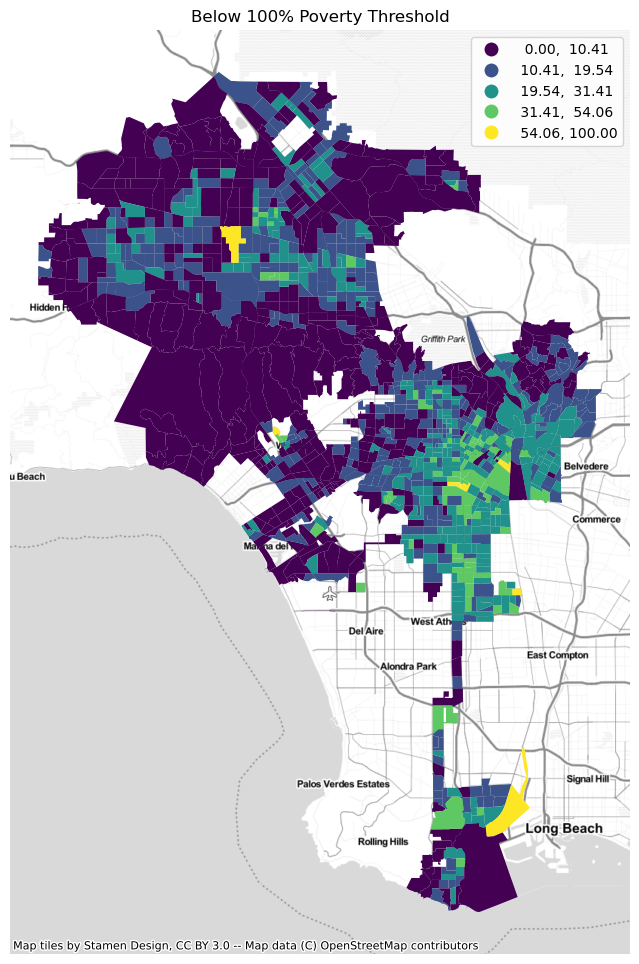

In [113]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))

#adding colour to the plot
PovertyLACity_web_mercator.plot(
            ax=ax,   
            column='pop_below_100_pct',
            legend=True, 
            scheme='NaturalBreaks'          
)
                
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Below 100% Poverty Threshold')

# add a basemap
ctx.add_basemap(ax, crs=3857, source=ctx.providers.Stamen.TonerLite)

In [114]:
RentBurdenLACity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [115]:
RentBurdenLACity_web_mercator = RentBurdenLACity.to_crs(epsg=3857)

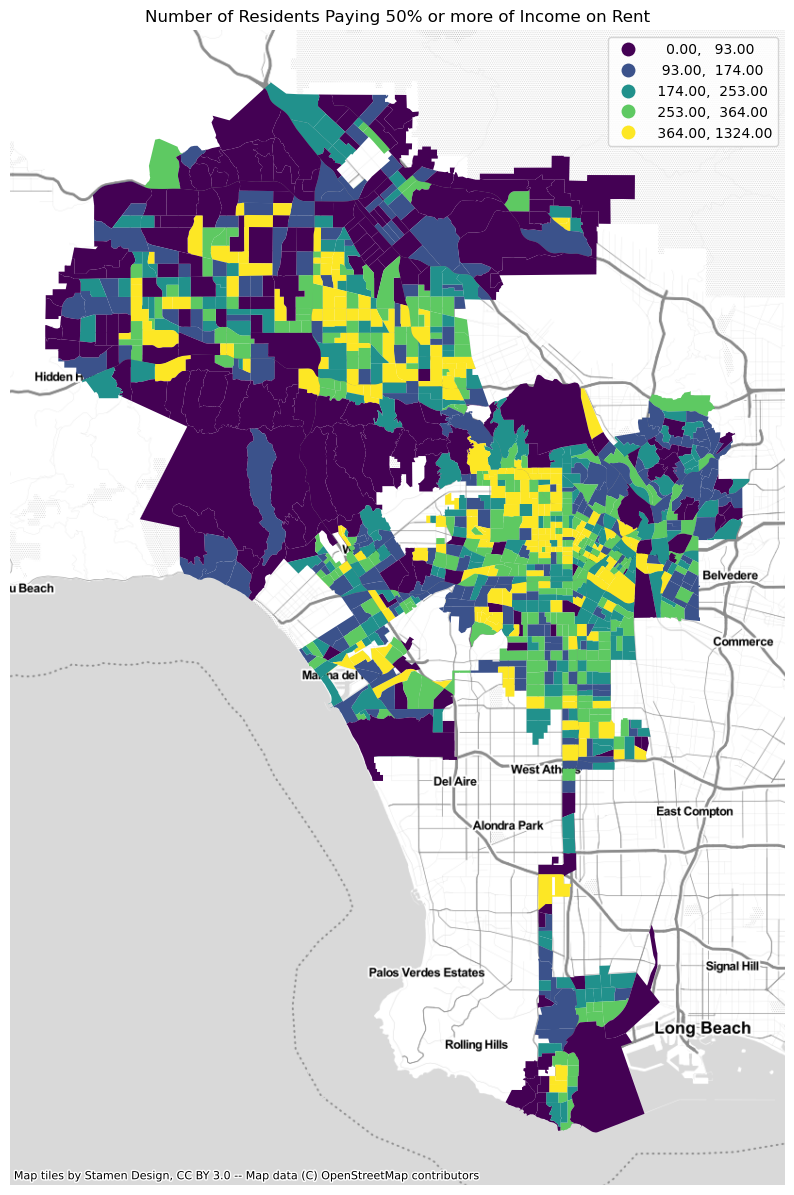

In [116]:
fig, ax = plt.subplots(figsize=(20, 15))
RentBurdenLACity_web_mercator.plot(
                 column='Residents Paying 50% or more of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Number of Residents Paying 50% or more of Income on Rent')

# add a basemap
ctx.add_basemap(ax, crs=3857, source=ctx.providers.Stamen.TonerLite)

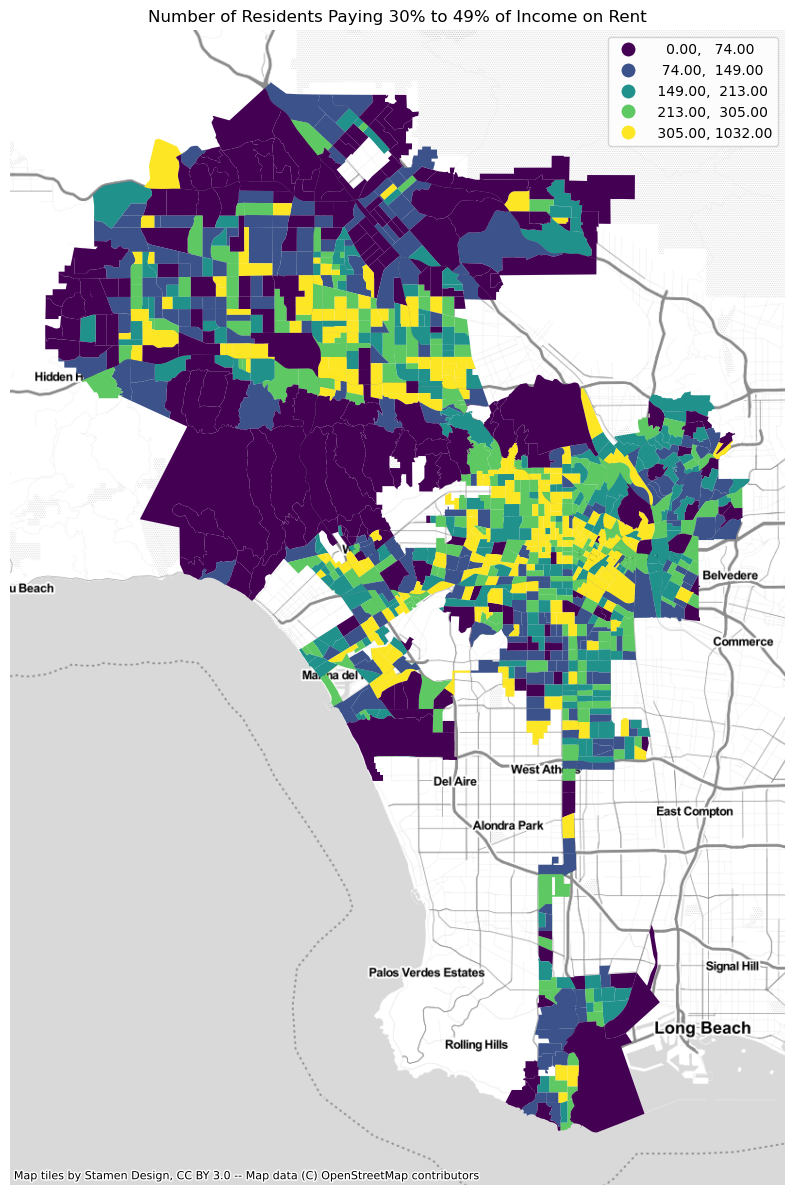

In [117]:
fig, ax = plt.subplots(figsize=(20, 15))
RentBurdenLACity_web_mercator.plot(
                 column='Residents Paying 30% to 49% of Income on Rent',
                 legend=True, 
                 scheme='quantiles',
                 ax=ax)

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Number of Residents Paying 30% to 49% of Income on Rent')

# add a basemap
ctx.add_basemap(ax, crs=3857, source=ctx.providers.Stamen.TonerLite)